In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
import seaborn as sns

![_](https://sun9-70.userapi.com/s/v1/ig2/g5xCi0MNRXLW4kwLwAO1SylnrS__AEzF6K8rTI4dyLkjRRi6AB6xvjBuuu-rN1r2XJ8r3mmctn9H87yIqUQ3wbdv.jpg?size=741x323&quality=96&type=album)

In [6]:
def type_of_dist():
    

    dist_type = int(input("""Enter the number of the desired distribution:\n
1 - Normal distribution
2 - Uniform distribution
3 - Binomial distribution
4 - Exponential distribution 
"""))
    if dist_type == 1:
        loc = int(input('Enter the loc: '))
        std = int(input('Enter the std: '))
        size = int(input('Enter the size: '))
        # Визуализация плотности:
        grid = np.linspace(st.norm.ppf([0.001],loc=loc, scale=std),st.norm.ppf([0.999],loc=loc, scale=std),num=10000)
        plt.subplot(3,1,1)
        plt.plot(grid, st.norm.pdf(grid,loc=loc,scale=std),color='g')
        plt.title('Визуализация плотности нормального распределения')
        plt.subplots_adjust(top=3,bottom=1)
        
        plt.subplot(3,1,2)
        sample = st.norm.rvs(loc=loc,scale=std,size=size)
        sns.histplot(sample,stat='density', color='r',alpha=0.5)
        plt.title(f"Гистограмма из выборки размера {size} из нормального распределения со средним {loc} и стандартным отклонением {std}")
        
        plt.subplot(3,1,3)
        plt.plot(grid, st.norm.pdf(grid,loc=loc,scale=std),color = 'g',label = 'Теоретическое распределение')
        sns.histplot(sample,stat='density',alpha=0.3, color = 'r', label = 'Эмпирическое распределение')
        plt.legend()
        
        
        print(f"Теоретическое мат. ожидание со средним {loc} и std {std} = {st.norm(loc,std).mean()} ")
        print(f"Среднее арифметическое из выборки размера {size} = {sample.mean()}")
        print(f"Абсолютная разница между теоретическим мат. ожиданием и средним из выборки размера {size} = {abs(st.norm(loc,std).mean() - sample.mean())}")
    
        
    elif dist_type == 2:
        start = int(input('Enter start: '))
        stop = int(input('Enter the end: '))
        size = int(input('Enter the size: '))
        
        x = np.arange(st.uniform(loc=start,scale=stop + abs(start)).ppf(0.001),st.uniform(loc=start,scale=stop + abs(start)).ppf(0.999),step=(abs(stop - start)) / 100)
        plt.subplots_adjust(top=3,bottom=1)
        plt.subplot(3,1,1)
        plt.plot(x, st.uniform(loc=start,scale=stop + abs(start)).cdf(x), color='g')
        plt.title(f'Теоретическая функция распределения из выборки размера {size}, с минимальным значением {start} и максимальным {stop}')
        
        plt.subplot(3,1,2)
        sample = st.uniform.rvs(loc=start,scale = stop + abs(start),size=size)
        sns.ecdfplot(sample,stat = 'proportion', color='r')
        plt.title(f"Эмпирическая функция распределения из выборки размера {size}, с минимальным значением {start} и максимальным {stop}")
        
        plt.subplot(3,1,3)
        plt.plot(x, st.uniform(loc=start,scale = stop + abs(start)).cdf(x),color='g' , label = 'Теоретическая функция распределения')
        sns.ecdfplot(sample,stat='proportion', color = 'r', label = 'Эмпирическая функция распределения')
        plt.legend(loc='upper left')
        
        print(f"Теоретическое мат. ожидание с мин. значением {start} и макс. значением {stop} = {st.uniform(loc=start,scale=stop + abs(start)).mean()} ")
        print(f"Среднее арифметическое из выборки размера {size} = {sample.mean()}")
        print(f"Абсолютная разница между теоретическим мат. ожиданием и средним из выборки размера {size} = {abs(st.uniform(loc=start,scale=stop + abs(start)).mean() - sample.mean())}")
        
        
    elif dist_type == 3:
        p = float(input('Enter the probability: '))
        size = int(input('Enter the size: '))
        
        plt.subplots_adjust(top=3,bottom=1)
        plt.subplot(3,1,1)
        x = np.arange(st.binom.ppf(0.001,p=p,n=size),st.binom.ppf(0.999,p=p,n=size))
        plt.plot(x, st.binom.pmf(x,p=p, n = size), color='g')
        plt.title(f'Визуализация Probability mass function для биномиального распределения с вероятностью успеха {p} и количеством {size}')
        
        plt.subplot(3,1,2)
        sample = st.binom.rvs(p=p,n=size, size = size)
        sns.histplot(sample,stat='density', color = 'r', alpha = 0.5)
        plt.title(f'Гистограмма из выборки размера {size} из биномиального распределения с вероятностью успеха {p}')
        
        plt.subplot(3,1,3)
        plt.plot(x, st.binom.pmf(x,p=p, n = size), label = 'Теоретическое распределение', color = 'g')
        sns.histplot(sample, stat = 'density', label = 'Эмпирическое распределение', color = 'r', alpha = 0.3)
        
        print(f"Теоретическое мат. ожидание с вероятностью успеха {p} и количеством испытаний {size} = {st.binom(p=p,n=size).mean()} ")
        print(f"Среднее арифметическое из выборки размера {size} = {sample.mean()}")
        print(f"Абсолютная разница между теоретическим мат. ожиданием и средним из выборки размера {size} = {abs(st.binom(p=p,n=size).mean() - sample.mean())}")
        
        
    elif dist_type == 4:
        scale = int(input('Enter the scale: '))
        size = int(input('Enter the size: ' ))
        
        grid = np.linspace(st.expon.ppf([0.001],scale=scale),st.expon.ppf([0.999],scale=scale), num=10000)
        plt.subplots_adjust(top=3,bottom=1)
        plt.subplot(3,1,1)
        plt.plot(grid,st.expon.pdf(grid,scale=scale),color='g')
        plt.title('Визуализация плотности экспоненциального распределения')
        
        plt.subplot(3,1,2)
        sample = st.expon.rvs(scale=scale,size=size)
        sns.histplot(sample,stat='density',color = 'r')
        plt.title(f"Гистограмма из выборки размера {size} из экспоненциального распределения со scale = {scale}")
        
        plt.subplot(3,1,3)
        plt.plot(grid,st.expon.pdf(grid,scale=scale),color = 'g',label = 'Теоретическое распределение')
        sns.histplot(sample,stat='density',color='r',alpha = 0.3,label = 'Эмпирическое распределение')
        plt.legend()
        
        print(f"Теоретическое мат. ожидание со scale =  {scale}  = {st.expon(scale=scale).mean()} ")
        print(f"Среднее арифметическое из выборки размера {size} = {sample.mean()}")
        print(f"Абсолютная разница между теоретическим мат. ожиданием и средним из выборки размера {size} = {abs(st.expon(scale=scale).mean() - sample.mean())}")
        
        
        
        
        

Enter the number of the desired distribution:

1 - Normal distribution
2 - Uniform distribution
3 - Binomial distribution
4 - Exponential distribution 
1
Enter the loc: 20
Enter the std: 4
Enter the size: 70
Теоретическое мат. ожидание со средним 20 и std 4 = 20.0 
Среднее арифметическое из выборки размера 70 = 19.531533743536794
Абсолютная разница между теоретическим мат. ожиданием и средним из выборки размера 70 = 0.4684662564632056


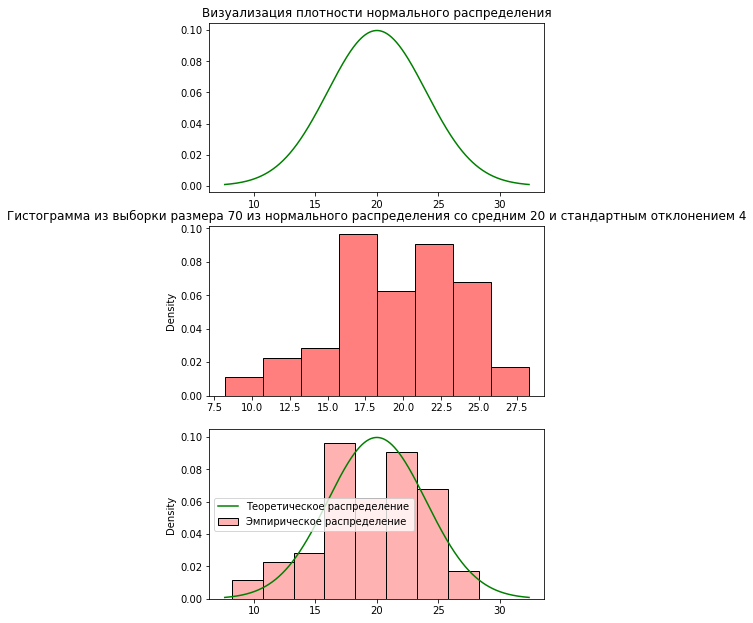

In [7]:
type_of_dist()

Enter the number of the desired distribution:

1 - Normal distribution
2 - Uniform distribution
3 - Binomial distribution
4 - Exponential distribution 
2
Enter start: 0
Enter end: 10
Enter size: 100
Теоретическое мат. ожидание с мин. значением 0 и макс. значением 10 = 5.0 
Среднее арифметическое из выборки размера 100 = 4.833169792776353
Абсолютная разница между теоретическим мат. ожиданием и средним из выборки размера 100 = 0.16683020722364716


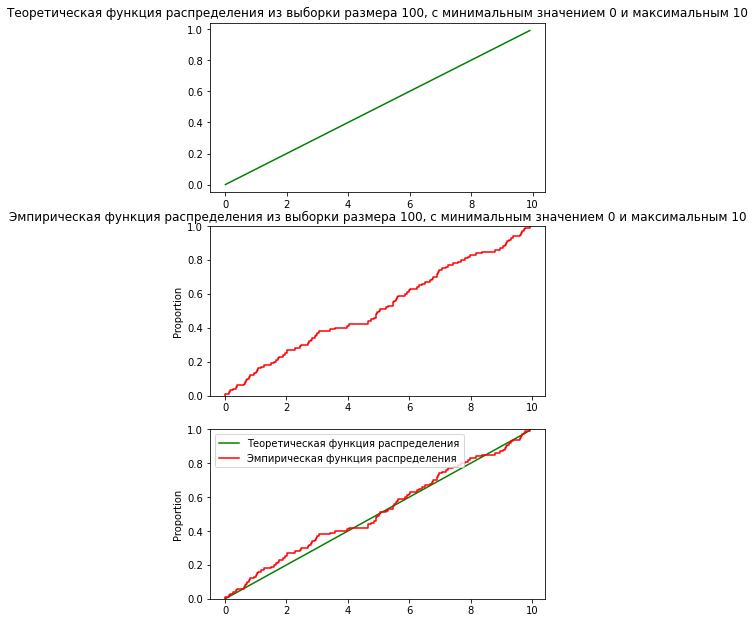

In [5]:
type_of_dist()

Enter the number of the desired distribution:

1 - Normal distribution
2 - Uniform distribution
3 - Binomial distribution
4 - Exponential distribution 
3
Enter the probability: 0.3
Enter the size: 70
Теоретическое мат. ожидание с вероятностью успеха 0.3 и количеством испытаний 70 = 21.0 
Среднее арифметическое из выборки размера 70 = 21.614285714285714
Абсолютная разница между теоретическим мат. ожиданием и средним из выборки размера 70 = 0.6142857142857139


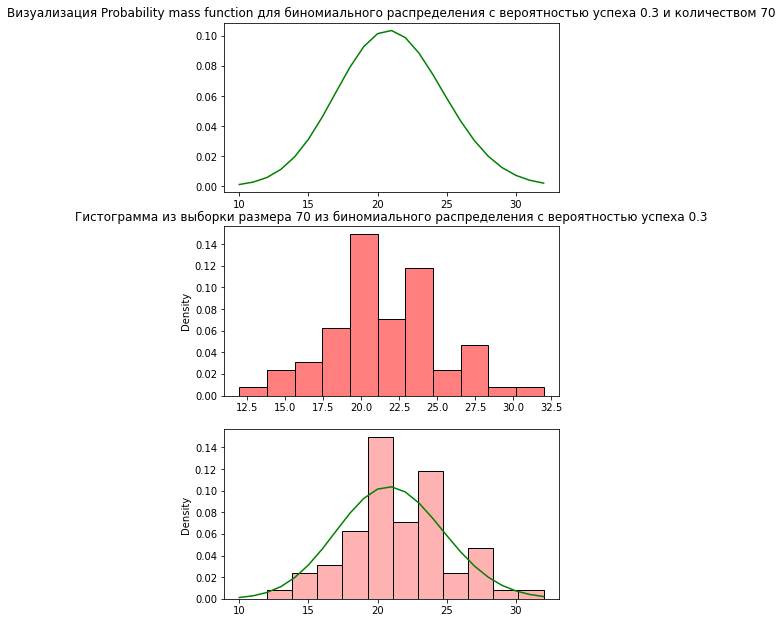

In [8]:
type_of_dist()

Enter the number of the desired distribution:

1 - Normal distribution
2 - Uniform distribution
3 - Binomial distribution
4 - Exponential distribution 
4
Enter the scale: 10
Enter the size: 700
Теоретическое мат. ожидание со scale =  10  = 10.0 
Среднее арифметическое из выборки размера 700 = 9.98664174279638
Абсолютная разница между теоретическим мат. ожиданием и средним из выборки размера 700 = 0.013358257203620383


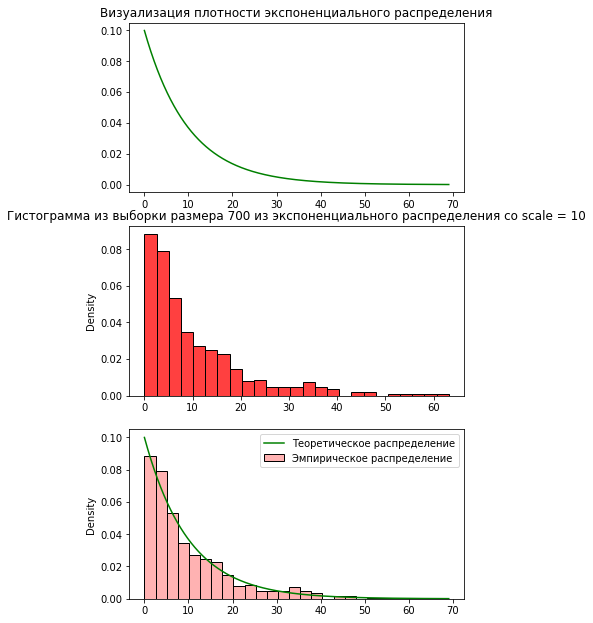

In [9]:
type_of_dist()